## Return



Normal return:

$$ R_{t,t+1} = \frac{P_{t+1}}{P_{t}} - 1 $$

Normal return + dividends:

$$ R_{t,t+1} = \frac{P_{t+1} + D_{t,t+1}}{P_{t}} - 1 $$

Compound return:

$$ R_{t,t+2} = (1+ R_{t,t+1})(1+R_{t+1,t+2}) - 1 $$

Annualized return (given monthly return):

$$ R_{annual} = (1+R_{monthly})^{12} - 1 $$




In [1]:
import pandas as pd

prices = pd.DataFrame({"BLUE": [8.70,8.91,8.71,8.43,8.73],
                       "ORANGE": [10.66,11.08,10.71,11.59,12.11]
                      })



In [2]:
prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


Now we can calculate the return for each period:

In [3]:
prices.iloc[1:]
prices.iloc[:-1]

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59


In [4]:
(prices.iloc[1:].values/prices.iloc[:-1]) - 1

#we use values to obtain the arrays from Pandas. We put it only in one of them,
# otherwise we would get a numpy matrix instead of a DataFrame 

,BLUE,ORANGE
0,0.024138,0.039400
1,-0.022447,-0.033394
2,-0.032147,0.082166
3,0.035587,0.044866


Or we can do the following:

In [5]:
prices/prices.shift(1) - 1 #This would return a Nan as first column

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


DataFrame also has this function, which is the easiest way:


In [6]:
prices.pct_change() #also returns a NaN first

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


Let's import some more prices:

In [16]:
prices = pd.read_csv('../Data/data/sample_prices.csv')

prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


<AxesSubplot:>

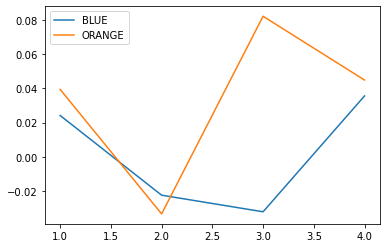

In [8]:
returns = prices.pct_change()

returns.plot() #rotísima esta mierda

<AxesSubplot:>

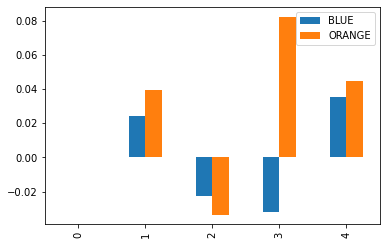

In [9]:
returns.plot.bar()

We can see that orange is much more volatile. This can be seen as well if we have a look at the standard deviation of both data:


In [10]:
returns.std() 

BLUE      0.033565
ORANGE    0.048328
dtype: float64

However, the average return is the same for both assets:


In [11]:
returns.mean()

BLUE      0.001283
ORANGE    0.033260
dtype: float64

Let's have a look at the compound return. For this, we use the function prod (productory, basically):


In [12]:
import numpy as np

np.prod(returns + 1) - 1 #don't forget to add the 1 to the returns

# (returns+1).prod() - 1 works as well

BLUE      0.003448
ORANGE    0.136023
dtype: float64

We saw that the mean was the same, but due to the volatily, the blue asset has a much better performance.

## Annualization

Let's say we have a monthly return of 0.01. The annualization would be:

In [13]:
rm = 0.01
(1+rm)**12 - 1

0.12682503013196977

With quarterly return:

In [14]:
rq = 0.04
(1+rq)**4 -1


0.1698585600000002

And daily return:

In [15]:
rd = 0.0001
(1+rd)**252 - 1 #252 days, stock market is open

0.025518911987694626